# Lab 3: Stochastic Gradient Descent

The goal of this lab session is to code an optimization algorithm that optimzes the penalized loss function of the logistic regression model.

You have to send the filled notebook named **"L3_familyname1_familyname2.ipynb"** (groups of 2) by email to aml.centralesupelec.2019@gmail.com by October 17, 2019. Please put **"AML-L3"** in the subject. 

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd


We import the dataset that we are going to use, an indian dataset including in the last column information about the diabetes status of patients:

In [2]:
from sklearn import model_selection

data = pd.read_csv("w8a.csv", sep=";", header = None)
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

# print(data)

## Logistic Regression



Today we’ll be moving from linear regression to logistic regression, one of the simplest ways to deal with a classification problem. Instead of fitting a line, logistic regression models the probability that the outcome is 1 given the value of the predictor. In order to do this we need a function that transforms our predictor variable to a value between 0 and 1. Lots of functions can do that, but the logistic function is the most common choice:

$$f(z) = \frac{1}{1+\exp{-z}}.$$

To predict the class of our observations we'll have to minimize the corresponding loss function and as we are in a high-dimensional context we'll add an $l_2$ regularization to the model:

$$L(\textbf{w}) = \sum_{i=1}^n log(1+\exp(-y_i\textbf{w}^Tx_i))+\frac{\lambda}{2} \| \textbf{w} \|^2,$$

where $x_i$ is the vector of features for the observation $i$ and $y_i \in \{-1, 1\}$ is the class label.  


We first use the `sklearn` implementation:

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2", C=2) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

and we compute the accuracy score to evaluate the model performance:

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.985320989158241

### Assignment

Implement from scratch your own logistic regression model with stochastic gradient descent optimization. 

- Fill in the class

- Display the evolution of the cost function along iterations. Do this for several strategies for the setting of the learning rate

- Try the different acceleration strategies

- Train the model with the training set and evaluate its performance in the test set

In [50]:
class StochasticLogisticRegression():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    bsize: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self, lr = 0.001, max_iter = 300, lambd = 0., batch_size = 1, alpha = 1):
        self.coef_  = None
        self.alpha_ = alpha
        self.lr_     = lr
        self.max_iter_ = max_iter
        self.batch_size_ = batch_size
        self.coef_history_ = []
        self.f_history_ = []
        self.loss_ = []

    def logistic(self, z):
        # logistic function
        return 1/(1 + np.exp(-z))
    
    def f_lr(self, X, y, rand_ind):
        '''evaluate the F=\sum_{i=1}^n f_i in beta'''
        loss = 0
        n, p = np.shape(X)
        loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)
        return loss[0][0]
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """        
        F = []
        n, p = np.shape(X)
        one_column = np.array([[1] for i in range(n)])
        # print(n)
        X = np.hstack((one_column,X))
        n, p = np.shape(X)
        self.coef_ = np.zeros((1,p))
        iteration = 0
        indices = [i for i in range(n)]
        while iteration < self.max_iter_:
            
            #compute the gradient
            deri_cost = np.zeros((1,p))
            der = np.zeros((1,p))
            rand_ind = random.sample(indices, self.batch_size_)
            deri_cost = sum([-y[i]*self.logistic(-y[i]*np.dot(X[i].reshape((1,p)), self.coef_.T))*X[i] for i in rand_ind]) + self.alpha_*self.coef_
            iteration += 1
            #update the coefficients
            self.coef_ = self.coef_ - (self.lr_/iteration)*deri_cost  
            
            #update other useful matrices
            self.coef_history_.append(self.coef_)
            self.f_history_.append(np.linalg.norm(deri_cost)**2)
            
            #update the Loss list
            self.loss_.append(self.f_lr(X, y, rand_ind))

            
    def predict(self, X_test):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        n, p = np.shape(X_test)
        one_column = np.array([[1] for i in range(n)])
        X_test = np.hstack((one_column,X_test))
        n, p = np.shape(X_test)
        y_pred = np.zeros((n,1))
        self.fit(X, y)
        for i in range(n):
            if np.dot(X_test[i],self.coef_.T) >= 0:
                y_pred[i] = 1
            else:
                y_pred[i] = -1
                
        ind = np.array([i for i in range(self.max_iter_)])
        #fig = plt.figure()
        plt.plot(ind,self.loss_)
        plt.show()
        
        return y_pred, self.coef_

Apply to the data

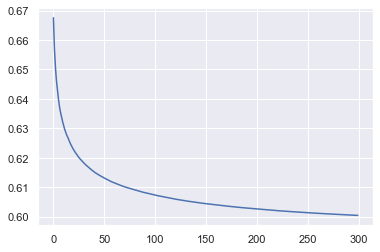

0.9696674381776099
[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]
(array([], dtype=int64), array([], dtype=int64))
[[-1.34702947e-01 -6.04146708e-03 -3.34410563e-03 -6.25746433e-03
  -2.85773681e-03 -4.45194168e-03 -4.39645191e-03 -5.63163701e-03
  -4.50541735e-03 -4.56622972e-03 -8.00687937e-03 -5.01486125e-03
  -3.46072808e-03 -4.43223998e-03 -4.54997489e-03 -4.21750537e-03
  -6.74536229e-03 -4.22588777e-03 -4.20337699e-03 -5.69799566e-03
  -6.87930790e-03 -6.36946987e-03 -2.79389553e-03 -7.19892522e-03
  -5.80710386e-03 -3.92222899e-03 -4.31198380e-03 -4.39306601e-03
  -5.56717362e-03 -3.55780696e-03 -3.77787005e-03 -4.55936058e-03
  -5.97488215e-03 -3.71643833e-03 -4.14208567e-03 -2.77922343e-02
  -2.75304890e-04 -1.10858992e-02 -1.87007453e-02  1.60342732e-04
   4.23048835e-06 -6.51035755e-04  3.45167162e-04  3.45167162e-04
  -1.06047553e-02 -6.98651219e-03 -1.61562136e-04 -9.70495721e-03
  -5.37501052e-05  1.31922386e-05 -6.50163659e-03 -6.90811290e-03
  -1.60378250e-04 -2.88404

In [56]:
import random
X = X_train
y = y_train

fig = plt.figure()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
# for i in learning_rate:
#     accuracy = 0
#     y_pred, coef = StochasticLogisticRegression(i).predict(X_test)
#     for i in range(np.shape(y_pred)[0]):
#         if y_pred[i] == y_test[i]:
#             accuracy += 1
#     accuracy = accuracy/np.shape(y_test)[0]
#     print(accuracy)

accuracy = 0
y_pred, coef = StochasticLogisticRegression().predict(X_test)
for i in range(np.shape(y_pred)[0]):
    if y_pred[i] == y_test[i]:
        accuracy += 1
accuracy = accuracy/np.shape(y_test)[0]
print(accuracy)

print(y_pred)
print(np.where(y_pred == 1))
print(coef)

Comment the results

In [13]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty='l2', max_iter=5)
clf.fit(X, y)
y_pred = clf.predict(X_test)
accuracy = 0
for i in range(np.shape(y_test)[0]):
    if y_pred[i] == y_test[i]:
        accuracy += 1
accuracy = accuracy/np.shape(y_test)[0]
print(accuracy)

0.9857473504689974


C:\Users\inesp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Implement only one acceleration method and compare the results

In [142]:
# def compute loss(theta)
# def compute grad(theta, batch_indices)

class AdamLogisticRegression():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    batch_size: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self,beta, gamma,  batch_size, lr = 1e-3, max_iter = 300, eps = 1e-8, alpha = 0):
        self.coef_  = None
        self.alpha_ = alpha
        self.lr_     = lr
        self.eps_ = eps
        self.gamma_ = gamma
        self.beta_ = beta
        self.max_iter_ = max_iter
        self.batch_size_ = batch_size
        self.coef_history_ = []
        self.f_history_ = []
        self.loss_ = []
        
    def logistic(self, z):
        # logistic function
        return 1/(1 + np.exp(-z))
        
    def f_lr(self, X, y):
        '''evaluate the F=\sum_{i=1}^n f_i in beta'''
        loss = 0
        n, p = np.shape(X)
        loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)
        return loss[0][0]
       
    def fit(self, X, y):
        
        #initialization of parameters
        n, p = np.shape(X)
        one_column = np.array([[1] for i in range(n)])
        # print(n)
        X = np.hstack((one_column,X))
        n, p = np.shape(X)
        m_t = np.zeros((1,p))
        v_t = 0
        self.coef_ = np.zeros((1,p))
        iteration = 0
        indices = [i for i in range(n)]
        
        while iteration < self.max_iter_:
            
            #compute the gradient
            deri_cost = np.zeros((1,p))
            rand_ind = random.sample(indices, self.batch_size_)
            deri_cost = sum([-y[i]*self.logistic(-y[i]*np.dot(X[i].reshape((1,p)), self.coef_.T))*X[i] for i in rand_ind]) + self.alpha_*self.coef_
            iteration += 1

            #computing the coefficients for adam
            m_t = self.beta_*m_t + (1-self.beta_)*deri_cost
            v_t = self.gamma_*v_t + (1-self.gamma_)*deri_cost*deri_cost
            m_t = m_t/(1-self.beta_**iteration)
            v_t = v_t/(1-self.gamma_**iteration)
            
            #updating parameters
            self.coef_ = self.coef_ - (self.lr_/(v_t**0.5 + self.eps_))*m_t
            self.coef_history_.append(self.coef_)
            self.f_history_.append(deri_cost)

            #update the Loss list
            self.loss_.append(self.f_lr(X, y))
 
    
    def predict(self, X_test):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        n, p = np.shape(X_test)
        one_column = np.array([[1] for i in range(n)])
        X_test = np.hstack((one_column,X_test))
        n, p = np.shape(X_test)
        y_pred = np.zeros((n,1))
        self.fit(X, y)
        for i in range(n):
            if np.dot(X_test[i],self.coef_.T) >= 0:
                y_pred[i] = 1
            else:
                y_pred[i] = -1
                
        ind = np.array([i for i in range(self.max_iter_)])
        fig = plt.figure()
        plt.plot(ind,self.loss_)
        plt.title('Variation of the loss function for beta = ' + str(self.beta_) + " , " + "gamma = " + str(self.gamma_)
                 + " and batch size = " + str(self.batch_size_))
        plt.show()
        
        return y_pred, self.coef_

In [143]:
def compute_accuracy(y_test, y_pred):
    accuracy = 0
    for i in range(np.shape(y_pred)[0]):
        if y_pred[i] == y_test[i]:
            accuracy += 1
    accuracy = accuracy/np.shape(y_pred)[0]
    return accuracy

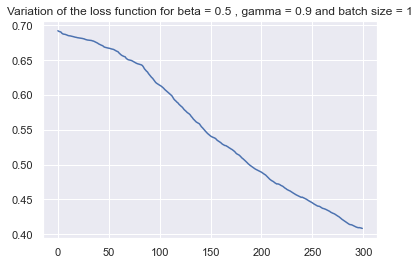

Pour le modèle avec beta = 0.5 on obtient une accuracy = 0.9696674381776099


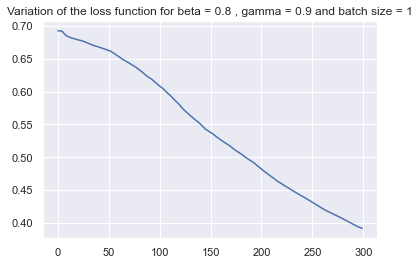

Pour le modèle avec beta = 0.8 on obtient une accuracy = 0.9696674381776099


<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: overflow encountered in exp
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)
<ipython-input-142-b6a84fb74257>:37: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: invalid value encountered in double_scalars
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)


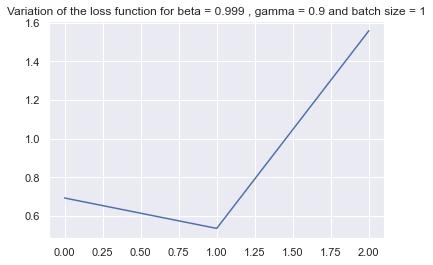

Pour le modèle avec beta = 0.999 on obtient une accuracy = 0.9696674381776099


In [144]:
#Montrer l'influence des différents paramètres
#loss totale en fonction des itérations
#comparer les courbes et commenter à la fin
#batch size,

X = X_train
y = y_train

beta_value = [0.5, 0.8, 0.999]
for j in beta_value:
    y_pred, coef = AdamLogisticRegression(beta = j, gamma = 0.9, batch_size = 1).predict(X_test)
    accuracy = compute_accuracy(y_test, y_pred)
    print("Pour le modèle avec beta = " + str(j) + " on obtient une accuracy = " + str(accuracy))


<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: overflow encountered in exp
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)
<ipython-input-142-b6a84fb74257>:37: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: invalid value encountered in double_scalars
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)


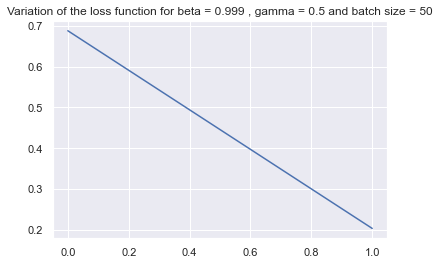

Pour le modèle avec gamma = 0.5 on obtient une accuracy = 0.9700937994883664


<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: overflow encountered in exp
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)
<ipython-input-142-b6a84fb74257>:37: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: invalid value encountered in double_scalars
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)


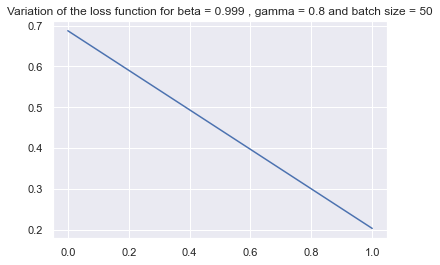

Pour le modèle avec gamma = 0.8 on obtient une accuracy = 0.9711292483859179


<ipython-input-142-b6a84fb74257>:43: RuntimeWarning: overflow encountered in exp
  loss = (1/n)*sum([np.log(1+np.exp(-y[i]*np.dot(X[i].reshape((1,p)),self.coef_.T))) for i in range(n)]) + self.alpha_*(np.linalg.norm(self.coef_)**2)
<ipython-input-142-b6a84fb74257>:37: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


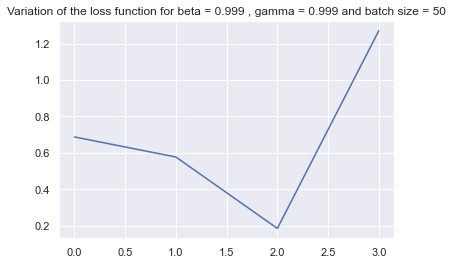

Pour le modèle avec gamma = 0.999 on obtient une accuracy = 0.9696674381776099


In [145]:
X = X_train
y = y_train

gamma_value = [0.5, 0.9, 1.1]
for j in beta_value:
    y_pred, coef = AdamLogisticRegression(beta = 0.999, gamma = j, batch_size = 50).predict(X_test)
    accuracy = compute_accuracy(y_test, y_pred)
    print("Pour le modèle avec gamma = " + str(j) + " on obtient une accuracy = " + str(accuracy))

In [176]:
class logisticregression():
    
    
    def __init__(self, alpha=0, beta = 0.999, gamma = 0.9,lr=0.001, bsize=50, max_iter=300, method = 'Classic',eps = 1e-7, Debias = True):
        self.alpha_ = alpha
        self.beta_ = beta
        self.gamma_ = gamma
        self.lr_ = lr
        self.bsize_ = bsize
        self.max_iter_ = max_iter
        self.coef_ = None
        self.f_history = None
        self.f_grad_history = None
        self.method_ = method
        self.eps_ = eps
        self.Debias_ = False
        self.loss_ = []
    
    def logistic(self,z):
        return 1/(1+np.exp(-z))
       
        
    def fit(self,X,y):
        n_samples,p_feat = X.shape
        one_column = np.array([[1] for i in range(n_samples)])
        X = np.hstack((one_column,X))
        n_samples,p_feat = X.shape
        n, p = np.shape(X_test)
        self.coef_ = np.zeros(p_feat)
        M_t = np.zeros(p_feat)
        S_t = np.zeros(p_feat)
        iteration = 1
        
        def compute_grad(theta,batch_indices):
            gradient = np.zeros(p_feat)
            for i in batch_indices:
                gradient+= -y[i]*self.logistic(-y[i]*theta.T@X[i])*X[i]
            return gradient + self.alpha_*self.coef_
        
        def compute_loss(theta):
            loss = 0
            for i in range(n_samples):
                loss = np.log(1+np.exp(-y[i]*theta.T@X[i]))
            return loss/n_samples + self.alpha_*(np.linalg.norm(theta)**2)/2
        
        #Générer les batch_indices:
        while iteration< self.max_iter_:
            batch_indices = random.sample(range(n_samples), self.bsize_)
            gradient = compute_grad(self.coef_,batch_indices)

            if self.method_ == 'Classic':
                self.coef_ -=  (self.lr_/iteration) * gradient
            elif self.method_ == 'Adam':
                M_t = self.beta_ * M_t + (1-self.beta_)*gradient
                S_t = self.gamma_ * S_t + (1-self.gamma_)*(gradient**2)
                if self.Debias_ :
                    M_t = M_t/(1-self.beta_**iteration)
                    S_t = S_t/(1-self.gamma_**iteration)
                self.coef_ -= self.lr_ * M_t/(S_t**0.5 + self.eps_)
            iteration +=1
            self.loss_.append(compute_loss(self.coef_))

            
    def predict(self, X_test):
        self.fit(X,y)
        n,p = X_test.shape
        one_column = np.array([[1] for i in range(n)])
        X_test = np.hstack((one_column,X_test))
        n,p = X_test.shape
        y_pred = np.zeros(n)
        for j in range(n):
            prediction = self.logistic(self.coef_.T@X_test[j])
            if prediction>= 0.5:
                y_pred[j] = 1
            else: 
                y_pred[j] = -1
        ind = np.array([i for i in range(self.max_iter_-1)])
        fig = plt.figure()
        plt.plot(ind,self.loss_)       
        return y_pred

0.9713119746619564


<Figure size 432x288 with 0 Axes>

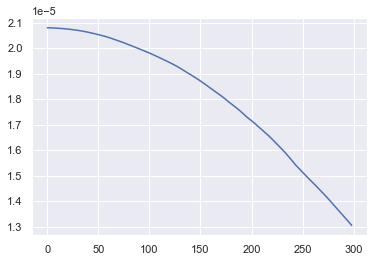

In [177]:
import random
X = X_train
y = y_train

fig = plt.figure()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
# for i in learning_rate:
#     accuracy = 0
#     y_pred, coef = StochasticLogisticRegression(i).predict(X_test)
#     for i in range(np.shape(y_pred)[0]):
#         if y_pred[i] == y_test[i]:
#             accuracy += 1
#     accuracy = accuracy/np.shape(y_test)[0]
#     print(accuracy)

accuracy = 0
y_pred = logisticregression(method = 'Adam').predict(X_test)
for i in range(np.shape(y_pred)[0]):
    if y_pred[i] == y_test[i]:
        accuracy += 1
accuracy = accuracy/np.shape(y_test)[0]
print(accuracy)
